# Lee Philippe - Boulogne Nathan

In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#  Réduction de dimensions et Visualisation des données


In [3]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values 
labels = data.iloc[:, 0].values

In [4]:
data.head() #afficher les 5 premieres lgines de la dataframe

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [5]:
data.shape
X.labels()

AttributeError: 'numpy.ndarray' object has no attribute 'labels'

## On normalise les données

In [6]:
from sklearn.decomposition import PCA #import la classe pour ACP
from sklearn.preprocessing import StandardScaler #import la classe pour centrer et reduire

In [18]:
scaler=StandardScaler()
pca=PCA(n_components=0.9,svd_solver="full")#on veut 90% de variance expliquee

In [42]:
Z=scaler.fit_transform(X) #on normalise nos donnees avec le scaler

In [43]:
X_pca=pca.fit_transform(Z) #on applique l'acp

In [44]:
print(pca.explained_variance_) #on affiche les valeurs propres
print(pca.explained_variance_ratio_) #variance expliquee de chaque axe

[10.80999558  1.45184229]
[0.87268193 0.11720602]


### On a conservé 2 axes principaux pour expliquer 90% de l'information, ici on expliquer 98.9% de l'information avec 2 axes principaux

In [45]:
pca.components_

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

In [46]:
1/np.sqrt(12)

0.2886751345948129

### y1 toutes les variables ont les mêmes poids, on a la température moyenne
### y2 on a des poids négatifs pour les mois d'été et de poids positifs pour les mois d'hiver, donc il fait plus froid en été et plus chaud en hiver

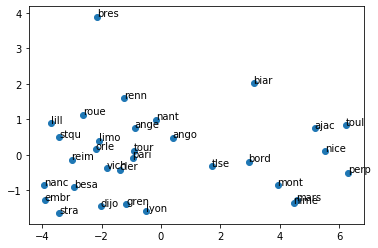

In [82]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### pour Toul, Perp, Nice et Ajac, on a un y1 élevé, cela signifie qu'en moyenne il fait plus chaud dans ces villes que dans les autres
### pour Brest, on a un y2 très élévé, cela signifie qu'il y a peu d'écart de température en hiver et en été

# ACP sur crimes.csv

In [36]:
data2=pd.read_csv('./crimes.csv', sep=';', header=0)

In [37]:
data2.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [54]:
X2=data2.iloc[:,1:8].values
labels2=data2.iloc[:,0].values

In [55]:
labels2

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New-Hampshire', 'New-Jersey', 'New-Mexico',
       'New-York', 'North-Carolina ', 'North-Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode-Island', 'South-Carolina ',
       'South-Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West-Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [56]:
Z2=scaler.fit_transform(X2) #on normalise nos données

In [75]:
X_pca2=pca.fit_transform(Z2) #on applique l'acp

In [76]:
print(pca.explained_variance_) #on a les valeurs propres
print(pca.explained_variance_ratio_) #variance expliquee de chaque axe

[4.19893828 1.26400187 0.74062921 0.32288984]
[0.58785136 0.17696026 0.10368809 0.04520458]


### Ici, on a conservé 4 axes pour expliquer au moins 90% de l'information.
### Selon le critère de Kaiser, on garde les valeurs propres qui sont supérieurs à 1: ici c'est les 2 premiers. Avec 2 axes, on explique 76% de l'information

In [77]:
pca.components_ #on affiche les 4 axes: y1, y2, y3 et y3

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832]])

In [78]:
1/np.sqrt(7)

0.3779644730092272

### y1 on a des poids assez équivalent sauf pour le dernier qui concerne les vols de voitures qui a un poids un peu plus faible, donc c'est la moyenne des 7 types de crimes. Avec un y1 elevé, on est dans une ville où il y a une forte criminalité
### y2 on des poids négatifs pour les meurtres, aggressions et des poids positifs pour tous les types de vols (avec violence, voitures et peu important). Donc lorsque y2 est elevé on est dans une ville où il y a + vols et - de meurtres/agressions. Et lorsque y2 est bas, on est dans une ville où il y a + de meurtres/agressions et - de vols.

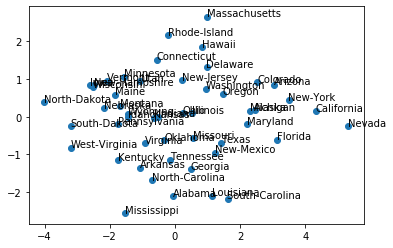

In [83]:
plt.scatter(X2_pca[:, 0], X_pca2[:, 1])
for label, x, y in zip(labels2, X_pca2[:, 0], X_pca2[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Par exemple, dans le Nevada on peut dire qu'en moyenne il y a une criminalité globale élevé.
### Au massachusetts, on a donc plus de vols que de meurtres/agressions.

# ACP sur 50_Startups.csv

In [85]:
data3=pd.read_csv('./50_Startups.csv', sep=';', header=0)

In [87]:
data3.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [89]:
data3.shape

(50, 5)

In [91]:
X3=data3.iloc[:,1:5].values
labels3=data3.iloc[:,0].values

In [94]:
Z3=scaler.fit_transform(X3) #on normalise les données
X_pca3=pca.fit_transform(Z3) #on applique l'acp

In [95]:
print(pca.explained_variance_) #on a les valeurs propres
print(pca.explained_variance_ratio_) #variance expliquee de chaque axe

[2.7267099  1.04019163]
[0.66804393 0.25484695]


### Ici, on a gardé 2 axes pour expliquer au moins 90% de l'information. Avec les 2 axes, on explique 92% de l'information

In [97]:
pca.components_

array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069]])

In [98]:
1/np.sqrt(4)

0.5

#### Pour y1, la deuxieme variable n'a pas de poids. y1 est donc corrélé positivement avec les dépenses en R&D, les dépenses Marketing et le Benefice. Donc une Startup qui dépense en R&D et en Marketing aura un bénéfice annuel équivalent aux dépenses
#### pour y2, on a un poids négatif pour la deuxieme variable, y2 est correlé négativement avec les Depenses Administratives

# Clustering sur les villes

In [109]:
from sklearn.cluster import KMeans

## D'abord avec Kmeans

In [110]:
kmeans=KMeans(n_clusters=3)

In [113]:
kmeans.fit(Z) #on applique le kmeans les données normalisées des villes

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
clustering=kmeans.labels_

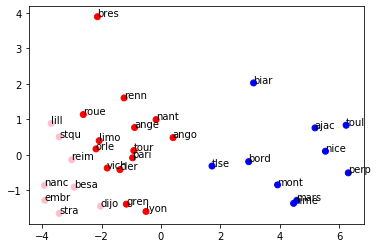

In [115]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [116]:
from sklearn.cluster import AgglomerativeClustering

In [119]:
ag_ward=AgglomerativeClustering(n_clusters=3)
ag_average=AgglomerativeClustering(linkage="average",n_clusters=3)

## AgglomerativeClustering avec ward

In [120]:
ag_ward.fit(Z) #application de AgglomerativeClustering avec methode aggregation ward

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [121]:
clustering2=ag_ward.labels_

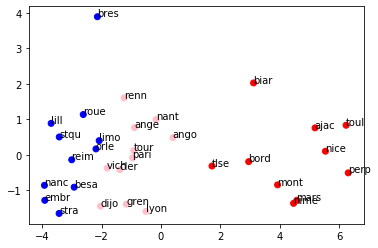

In [122]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering2, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## AgglomerativeClustering avec average

In [123]:
ag_average.fit(Z) ##application de AgglomerativeClustering avec methode aggregation average

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [124]:
clustering3=ag_average.labels_

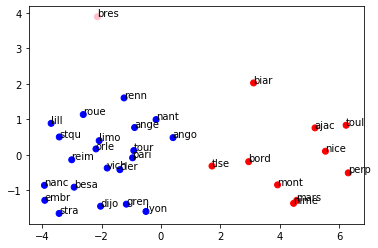

In [125]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering3, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# Utilisation du critère " Silhouette index" 

In [127]:
from sklearn import metrics
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(Z)
 print(metrics.silhouette_score(Z, clustering,metric='euclidean'))
 print()

0.625557719180767

0.3836500332030729

0.36151471170277005

0.30667264892732204



#### On choisit celui qui a les critère le + élevé donc avec 2 cluster

## Choix du meilleur algorithme pour 3 clusters.

#### Critère de silhouette index pour kmeans

In [128]:
 clustering = KMeans(n_clusters=3).fit_predict(Z)
 print(metrics.silhouette_score(Z, clustering,metric='euclidean'))
 print()

0.3836500332030729



#### Critère Silhouette index pour AgglomerativeClustering avec aggregation ward

In [129]:
 clustering = AgglomerativeClustering(n_clusters=3).fit_predict(Z)
 print(metrics.silhouette_score(Z, clustering,metric='euclidean'))
 print()

0.3680782608000545



#### Critère Silhouette index pour AgglomerativeClustering avec aggregation average

In [130]:
 clustering = AgglomerativeClustering(n_clusters=3,linkage="average").fit_predict(Z)
 print(metrics.silhouette_score(Z, clustering,metric='euclidean'))
 print()

0.49568744626910916



### Le meilleur est donc l'AgglomerativeClustering avec aggregation average

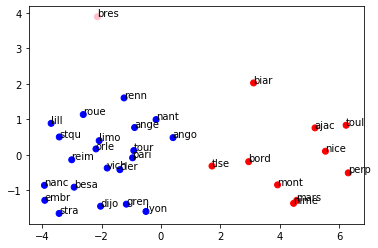

In [131]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering3, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### On a donc 3 clusters : Brest est tout seul 